## Redimensionando imagens pelos pontos de interesse
***

Redimensionamento de Imagens com Base no Conteúdo (Seam Carving)

* http://perso.crans.org/frenoy/matlab2012/seamcarving.pdf
* https://www.youtube.com/watch?v=qadw0BRKeMk
* http://eric-yuan.me/seam-carving/

Introduzido pela Avidan e Shimar em 2007, o algoritmo Seam Carving é usado para redimensionar uma imagem removendo / adicionando "costuras" (seams) com pouca energia. As costuras são definidas como pixels conectados que fluem da esquerda para a direita ou de cima para baixo, desde que atravessem toda a largura / altura da imagem.

O algoritmo Seam Carving funciona ao encontrar pixels conectados chamados costuras com baixa energia (ou seja, menos importante) que atravessam toda a imagem da esquerda para a direita ou de cima para baixo. Estas costuras são então removidas da imagem original, permitindo-nos redimensionar a imagem,  preservando as regiões mais salientes (o algoritmo original também suporta a adição de costuras, o que nos permite aumentar o tamanho da imagem também).

Tenha em mente que a finalidade do Seam Carving é preservar as regiões mais salientes (ou seja, "interessantes") de uma imagem enquanto ainda redimensiona a imagem em si. Métodos tradicionais para redimensionar imagens não se preocupam em determinar as partes interessantes de uma imagem.  O Seam Carving aplica, em vez disso, heurísticas / trajetórias derivadas do mapa de energia para determinar quais regiões da imagem podem ser removidas / duplicadas para garantir que todas as regiões "interessantes" da imagem sejam preservadas e isso é feito de forma esteticamente agradável.

![image](https://user-images.githubusercontent.com/14116020/72210719-92c3bd00-349e-11ea-88a3-d6452f7ea9c0.png)
![image](https://user-images.githubusercontent.com/14116020/72210723-9eaf7f00-349e-11ea-8f4c-6bffc2c6e95b.png)


***

In [1]:
from matplotlib import pyplot as plt
from skimage import transform
from skimage import filters
import cv2


def show(img, title=""):
    """
    Redimensionar a imagem e mostrar no codigo.
    """

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.rcParams['figure.figsize'] = (50, 50)
    plt.title(title, fontdict={"fontsize": 100})
    plt.imshow(img)
    plt.axis("off")
    plt.show()

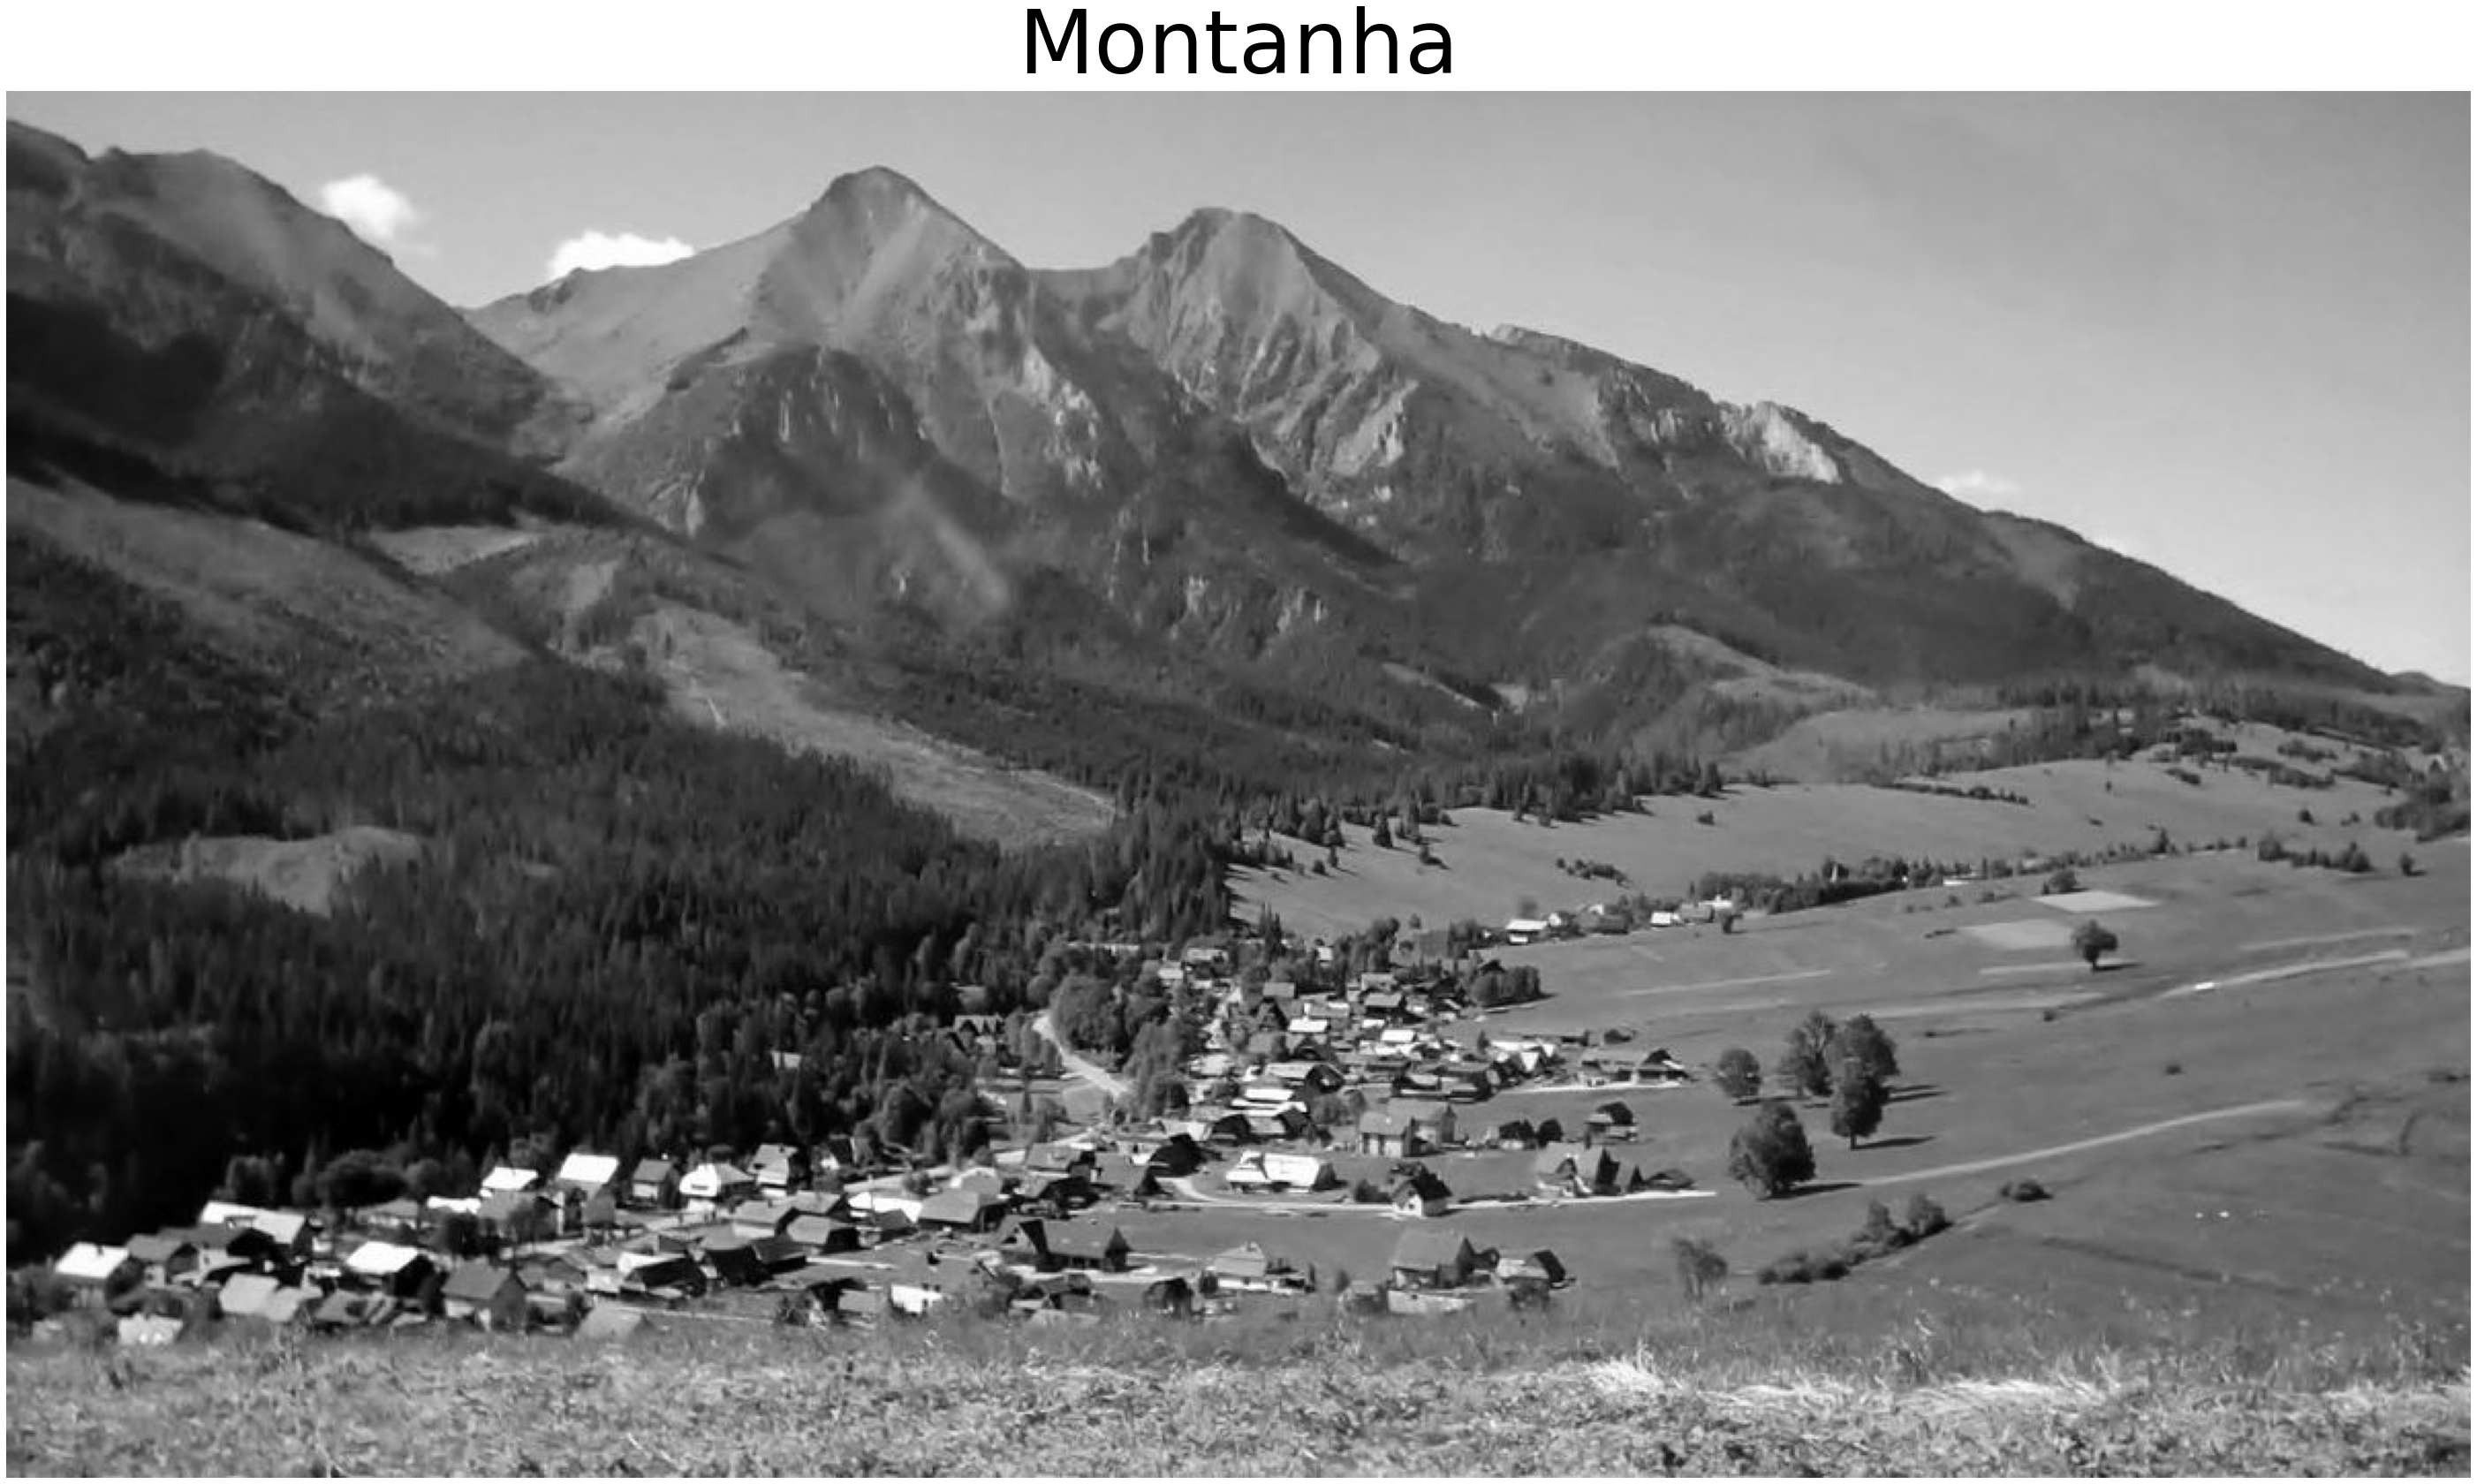

In [2]:
image = cv2.imread('imagens/montanha.jpg', 0)
show(image, "Montanha")

In [3]:
# Calcula a representação de magnitude do gradiente Sobel da imagem
# isso servirá como nossa entrada do "mapa de energia" para o algoritmo Seam Carving
mag = filters.sobel(image.astype("float"))

In [4]:
direction = "vertical"

# Loop pelo número de seams para remover
for numSeams in range(20, 180, 20):
    # Executa o Seam Carving, remove o número desejado de frames da imagem - os cortes 'verticais' irão alterar a largura da imagem enquanto os 
    # cortes 'horizontais' mudarão a altura da imagem
    carved = transform.seam_carve(image, mag, direction, numSeams)
    print("Removendo {} seams; novo tamanho: "
        "w={}, h={}".format(numSeams, carved.shape[1],
            carved.shape[0]))
 
    # Output
    show(carved, "Carved")

AttributeError: module 'skimage.transform' has no attribute 'seam_carve'